## Computational Model of $\textit{Major Depressive Disorder (MDD)}$  
#### Kevin Kistermann - Master Thesis [Universität Tübingen, Quantitative Data Science Methods (M.Sc.)]  

code partly from here https://github.com/ShirleyBWang/math_model_suicide 
* ["Mathematical and Computational Modeling of Suicide as a Complex Dynamical System" - Shirley Wang, Donald Robinaugh, Alex Millner, Rebecca Fortgang, and Matthew K. Nock](https://osf.io/preprints/psyarxiv/b29cs)

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

## 1. Simulation of [Stress Stimuli]

Desired properties and dynamics:

- In general, stressors should remain relatively low, with small fluctuations up and down.
- However, stressors *should* sometimes show sharp spikes up and down.
- There should be a fair amount of variability in stressors over time (between and within persons).
- Stressors should be above zero.

$\quad \rightarrow \quad$ Geometric Brownian Motion

$SS$ = [stress stimuli] $\quad \rightarrow \quad$ $\Large SS_{t+1} = SS_t \cdot e^{[\mu - (\frac{\sigma^2}{2}) \cdot dt + \sigma \cdot \mathcal{N}(0, \sqrt{dt})]}$ $\quad$ with $\quad$ $\sigma = 0.005 \cdot e^{Re + H + E}$ $\quad$ $\mu = \frac{\sigma^2}{2}$

$Re$ = [poor interpersonal relationship quality] $\quad \rightarrow \quad$ $\Large Re \sim Beta(1, 1)$  
   
$E$ = [poor economic status] $\quad \rightarrow \quad$ $\Large E \sim Beta(1, 1)$

$H$ = [poor physical health] $\quad \rightarrow \quad$ $\Large H \sim Beta(1, 1)$

In [3]:
def geometric_brownian(t, dt, mu, sigma, s0):
    '''
    args:
        t: time period to integrate over
        dt: time step
        mu: drift
        sigma: volatility
        s0: initial value
    '''
    
    SS = np.zeros(t)
    SS[0] = s0
    
    for i in range(0, len(SS) - 1):
        SS[i + 1] = SS[i]*np.exp((mu - ((sigma**2)/2))*dt + sigma*np.random.normal(0, np.sqrt(dt)))
        if SS[i + 1] < 0: # keep values between 0 and 1
            SS[i + 1] = 0
        if SS[i + 1] > 1:
            SS[i + 1] = 1
    return(SS)

### Example of possible [stress stimuli] values for 8 individuals over 10 year:


Re: [0.39764749]
E: [0.25447935]
H: [0.25084197]
Geometric Brownian Motion parameters:
starting value: 0.05
sigma: [0.01233458]
mu: [7.60709356e-05]


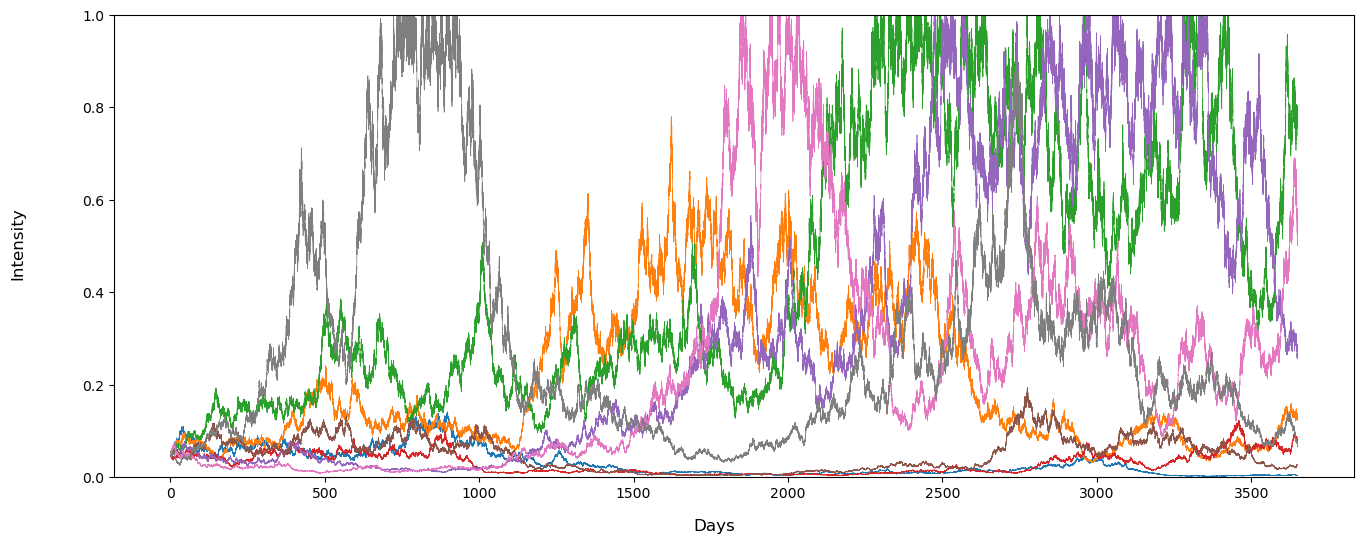

In [5]:
# figure parameters 
fig_width = 16
fig_height = 6
legend_size = 10
axis_size = 14

# set time t and time step dt in minutes
t, dt = 1440*365*10, 0.01 # 1440 min. = 1 Day

np.random.seed(514)

# generating values for [poor interpersonal relationship quality] and [poor economic status], and [poor physical health]
Re = np.random.beta(1, 1, 1)
print("Re:", Re)

E = np.random.beta(1, 1, 1)
print("E:", E)

H = np.random.beta(1, 1, 1)
print("H:", H)

# define initial paramters for Geometric Brownian Motion
s0 = 0.05
print("Geometric Brownian Motion parameters:")
print("starting value:", s0)

sigma = 0.005*np.exp(Re + H + E) # base-value: 0.005 and max-value : 0.005*exp(2)=0.1 for sigma
print("sigma:", sigma)

mu = (sigma**2) / 2
print("mu:", mu)

# plot [stress stimuli] for 8 individuals
fig, ax = plt.subplots(1, 1, figsize = (fig_width,fig_height))
for i in range(8):
    SS = geometric_brownian(t, dt, mu, sigma, s0)
    ax.plot((np.arange(t)/1440), SS, linewidth=0.5)
    ax.set_ylim([0, 1])
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
fig.text(0.5, 0.02, 'Days', ha='center', fontsize = 12)
fig.text(0.06, 0.5, 'Intensity', va='center', rotation='vertical', fontsize = 12)
#plt.savefig("", dpi = 300, transparent = True)
plt.show()

## Complete Model - Variables & Equations
### Fixed Variables:

$EAE$ = [early adverse experiences] $\quad \rightarrow \quad$ $\Large EAE \sim Beta(1, 1)$

$S$ = [sleep problems] $\quad \rightarrow \quad$ $\Large S \sim Beta(1, 1)$ 

### Psychological Variables:

$PS$ = [perceived stress] $\quad \rightarrow \quad$ $\Large PS_{t+1} = SS_{t} \cdot e^{NCS_{t} - C_{t}} + \epsilon_{t}$ $\quad$ with $\quad$ $\epsilon_{t} = \mathcal{N}(0, 0.0001)$

$NCS$ = [negative cognitive schemas] $\quad \rightarrow \quad$  $\Large NCS \sim Beta(e^{EAE} \cdot e^{EAE}, 2.7)$ 

$\Large \frac{dNCS}{d\lambda} = \begin{cases}
  -0.01,  & if \quad mean(C_{t-2 \cdot \lambda,...,t-\lambda}) < mean(C_{t-\lambda,...,t}) \\
  +0.01, & if \quad mean(C_{t-2 \cdot \lambda,...,t-\lambda}) > mean(C_{t-\lambda,...,t}) \\
  0, & otherwise
\end{cases}$

$C$ = [cognitive performance] $\quad \rightarrow \quad$ $\Large C_{t+1}= C_{t} + dt \cdot (\frac{1}{1+e^{PS \cdot (m_{t} + L_{t}))}} - C_{t})$  

$L$ = [learning, reward processing and memory] $\quad \rightarrow \quad$ $\Large L_{t+1} = L_{t} + dt \cdot (\frac{1}{1 + e^{(-m_{t} + c_{t} + N_{t} + S)}} - L_{t})$ 

### Neurobiological Variables:

$cy$ = [cytokine] $\quad \rightarrow \quad$ $\Large cy_{t+1} = cy_{t} + dt \cdot (\frac{1}{1 + e^{-PS_{t} \cdot (cy_{t} - GR_{t}) + H}} - cy_{t})$

$GR$ = [effective GR] $\quad \rightarrow \quad$ $\Large GR_{t+1} = GR_{t} + dt \cdot (\frac{1}{1+ e^{(c_{t} + cy_{t})}} - GR_{t})$

$c$ = [cortisol] $\quad \rightarrow \quad$ $\Large c_{t+1} = c_{t} + dt \cdot (\frac{1}{1+ e^{-(PS_{t} \cdot e^{EAE}) - GR_{t} + H}} - c_{t})$

$m$ = [monomines] $\quad \rightarrow \quad$ $\Large m_{t+1} = m_{t} + dt \cdot (\frac{1}{1 + e^{(c_{t} + cy_{t})}} - m_{t})$

$N$ = [neurodegeneration, decrease in hippocampal volume]   

$\Large \delta_{\theta}=\frac{c_{t-\theta,...,t}}{cy_{t-\theta,...,t}}$ for each period $\theta$

$\Large \frac{dN}{d\theta} = \begin{cases}
  0.001 \cdot \delta_{\theta},  & if \quad \delta_{\theta} > mean(\delta)  \\
  o, & otherwise
\end{cases}$

In [6]:
def model_MDD(t, dt, mu, sigma, s0, NCS, S, EAE, H):
    
    data = np.zeros([12, t])

    data[0] = geometric_brownian(t, dt, mu, sigma, s0) # [stress stimuli]
    data[1] = np.random.normal(0, 0.0001, t) # epsilon
    
    # Psychological Variables - set initial values
    data[2][0] = 0.05 # [perceived stress] initial value
    data[3][0] = 0.5 # [cognitive performance]
    data[4][0] = 0.35 # [learning, reward processing and memory]
    data[5][0] = NCS # [negative cognitive schema]

    # Neurobiological Variables - set initial values
    data[6][0] = 0.5 # [cytokine]
    data[7][0] = 0.32 # [effective GR]
    data[8][0] = 0.25 # [cortisol]
    data[9][0] = 0.32 # [monomines]
    data[10][0] = 0 # [neurodegeneration]
    data[11][0] = 0 # delta_N
    
    # updating values for each step t
    for i in range(t - 1):
        
        # updating [perceived stress]
        data[2][i + 1] = data[0][i] * np.exp(data[5][i] - data[3][i]) + data[1][i] 
        if data[2][i + 1] > 1:
            data[2][i + 1] = 1
        
        # updating [cognitive performance]
        data[3][i + 1] = data[3][i] + dt * ((1 / (1 + np.exp(data[2][i] * (data[9][i] + data[4][i])))) - data[3][i])
        
        # updating [learning, reward processing and memory]
        data[4][i + 1] = data[4][i] + dt * ((1 / (1 + np.exp((-data[9][i] + data[8][i] + data[10][i] + S)))) - data[4][i]) 
        
        # updating [negative cognitive schema]      
        period_NCS = 1440*7 # period_NCS = lambda
        if i % period_NCS == 0 and i > period_NCS:
            mean_NCS_pre = np.mean(data[3][i-2*period_NCS:i-period_NCS])
            mean_NCS_cur = np.mean(data[3][i-period_NCS:i])
            if mean_NCS_cur > mean_NCS_pre:
                data[5][i + 1] = data[5][i] - 0.01
            elif mean_NCS_cur < mean_NCS_pre:
                data[5][i + 1] = data[5][i] + 0.01 
        else:
            data[5][i + 1] = data[5][i]
        
        # updating [cytokine]
        data[6][i + 1] =  data[6][i] + dt * ((1 / (1 + np.exp(-data[2][i] * (data[6][i] - data[7][i]) + H))) -  data[6][i]) 
        
        # updating [effective GR]
        data[7][i + 1] = data[7][i] + dt * ((1 / (1 + (np.exp(data[8][i] + data[6][i])))) - data[7][i]) 
        
        # updating [cortisol]
        data[8][i + 1] = data[8][i] + dt * ((1 / (1 + np.exp(-(data[2][i] * np.exp(EAE) - data[7][i]) + H))) - data[8][i])
        if data[8][i + 1] > 1:
            data[8][i + 1] = 1
        
        # updating [monomines]
        data[9][i + 1] = data[9][i] + dt * ((1 / (1 + (np.exp(data[8][i] + data[6][i])))) - data[9][i])
        
        # updating [neurodegeneration]
        period_N = 1440*30 # period_N = theta
        if i % period_N == 0 and i > period_N:
            delta = np.mean(data[8][i-period_N:i]) / np.mean(data[6][i-period_N:i])
            delta_mean = np.mean(data[8][0:i]) / np.mean(data[6][0:i])
            if delta > delta_mean:
                data[10][i + 1] = data[10][i] + 0.001 * delta
            elif delta < delta_mean:
                data[10][i + 1] = data[10][i]
        else:
            data[10][i + 1] = data[10][i]

    return(data)

EAE: [0.01923988]
Re: [0.4879117]
E: [0.60551]
H: [0.44180948]
NCS: [0.64306734]
S: [0.425605]
sigma: [0.04642399]


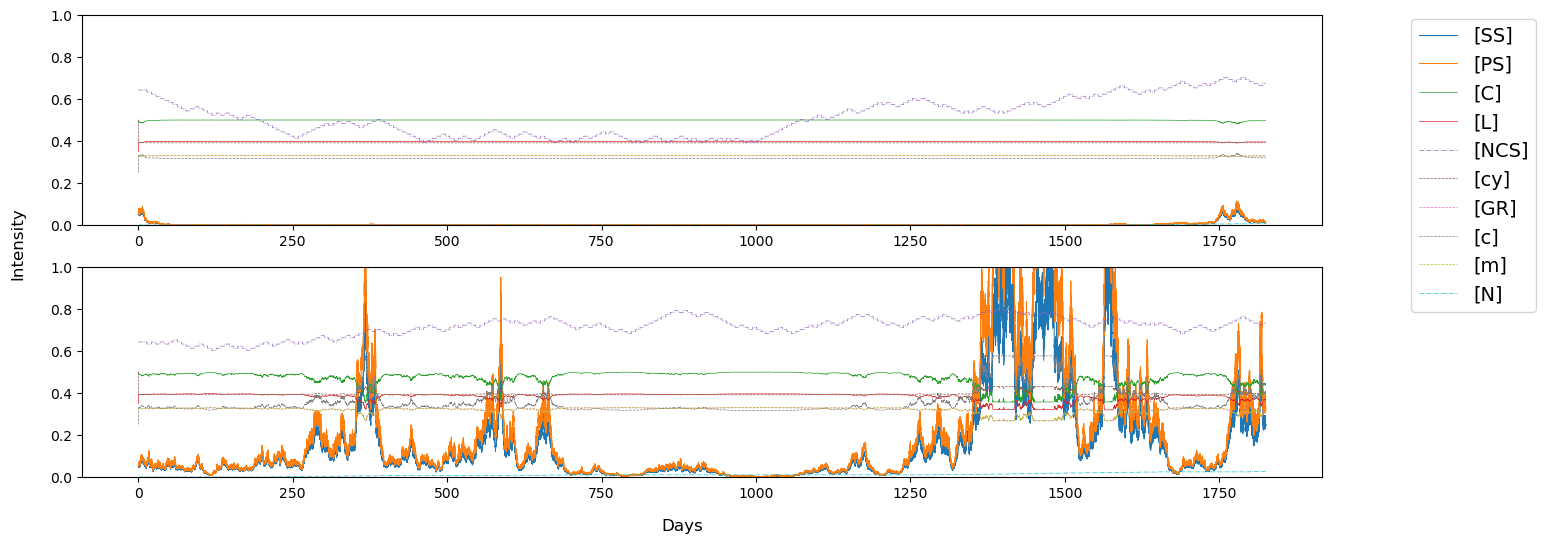

In [7]:
# figure parameters 
fig_width = 16
fig_height = 6
legend_size = 14
axis_size = 12

np.random.seed(48)

# time t and time step dt in minutes
t, dt = 1440*365*5, 0.01 # 1440 min. = 1 Day

# generating values for fixed variables
EAE = np.random.beta(1, 1, 1) # EAE = [early adverse experiences]
print("EAE:", EAE)

Re = np.random.beta(1, 1, 1) # Re = [poor interpersonal relationship quality]
print("Re:", Re)

E = np.random.beta(1, 1, 1) # E = [poor economic status]
print("E:", E)

H = np.random.beta(1, 1, 1) # H = [poor physical health]
print("H:", H)

NCS = np.random.beta(np.exp(EAE) *  np.exp(EAE), 2.7) # NCS = [negative cognitive schemas]
print("NCS:", NCS)

S = np.random.beta(1, 1, 1) # S = [sleep problems]
print("S:", S)

# define initial paramters for Geometric Brownian Motion
s0 = 0.05
sigma = 0.01*np.exp(Re + H + E) # base-value: 0.01 and max-value : 0.01*exp(2)=0.0738 for sigma
print("sigma:", sigma)
mu = (sigma**2) / 2

# plot all variables for 2 individuals
fig, ax = plt.subplots(2, 1, figsize=(fig_width,fig_height), sharey = True)
ax = ax.ravel()
for i in range(2):
    data = model_MDD(t, dt, mu, sigma, s0, NCS, S, EAE, H)
    ax[i].plot((np.arange(t)/1440), data[0], label = '[SS]', linewidth = 0.75)
    ax[i].plot((np.arange(t)/1440), data[2], label = '[PS]',linewidth = 0.75)
    ax[i].plot((np.arange(t)/1440), data[3], label = '[C]', linewidth = 0.5)
    ax[i].plot((np.arange(t)/1440), data[4], label = '[L]', linewidth = 0.5)
    ax[i].plot((np.arange(t)/1440), data[5], label = '[NCS]', linewidth = 0.5, linestyle='-.')
    ax[i].plot((np.arange(t)/1440), data[6], label = '[cy]', linewidth = 0.5, linestyle='--')
    ax[i].plot((np.arange(t)/1440), data[7], label = '[GR]', linewidth = 0.5, linestyle='--')
    ax[i].plot((np.arange(t)/1440), data[8], label = '[c]', linewidth = 0.5, linestyle='--')
    ax[i].plot((np.arange(t)/1440), data[9], label = '[m]', linewidth = 0.5, linestyle='--')
    ax[i].plot((np.arange(t)/1440), data[10], label = '[N]', linewidth = 0.5, linestyle='-.')
    ax[i].set_ylim([0, 1])
    if i == 0:
        fig.legend(bbox_to_anchor=(1.04, 0.89), fontsize = legend_size)
fig.text(0.5, 0.02, 'Days', ha='center', fontsize = axis_size)
fig.text(0.08, 0.5, 'Intensity', va='center', rotation='vertical', fontsize = axis_size)
#plt.savefig("figures/for_paper/stressor_av_low.png", dpi = 300, transparent = True, bbox_inches='tight')
plt.show()

In [1]:
t = 1440*1
t_2 = 1440*400
#print("max:", np.max(data[3][t:t_2]))
#print("min:", np.min(data[3][t:t_2]))
#print("mean:", np.mean(data[3][t:t_2]))

plt.plot((np.arange(t_2-t)/1440), data[0][t:t_2], linewidth = 0.75)
plt.plot((np.arange(t_2-t)/1440), data[2][t:t_2], linewidth = 0.75)
plt.plot((np.arange(t_2-t)/1440), data[3][t:t_2], linewidth = 0.75)
plt.plot((np.arange(t_2-t)/1440), data[4][t:t_2], linewidth = 0.75)
plt.plot((np.arange(t_2-t)/1440), data[5][t:t_2], linewidth = 0.75)
plt.plot((np.arange(t_2-t)/1440), data[6][t:t_2], linewidth = 0.75)
plt.plot((np.arange(t_2-t)/1440), data[7][t:t_2], linewidth = 0.75)
plt.plot((np.arange(t_2-t)/1440), data[8][t:t_2], linewidth = 0.75)
plt.plot((np.arange(t_2-t)/1440), data[9][t:t_2], linewidth = 0.75)
plt.plot((np.arange(t_2-t)/1440), data[10][t:t_2], linewidth = 0.75)

NameError: name 'np' is not defined

##### Quick Functional Checks:

In [8]:
# checking if [N] updates correctly --> should only ever increase if "delta" > "delta_mean", otherwise stay the same (never decrease!)
print("initial cy:", data[6][0])
print("initial c:", data[8][0])
print("initial N:", data[10][0])
print("mean_c,", "mean_cy,", "delta,", "delta_mean,", "N")
period_N = 1440*30
for i in range(t-1):
    if i % period_N == 0 and i > period_N:
            mean_c = np.mean(data[8][i-period_N:i]) # cortisol
            mean_cy = np.mean(data[6][i-period_N:i]) # cytokine
            delta = mean_c/mean_cy
            delta_mean = np.mean(data[8][0:i]) / np.mean(data[6][0:i])

            print(mean_c, mean_cy, delta, delta_mean, data[10][i])

initial cy: 0.5
initial c: 0.25
initial N: 0.0
mean_c, mean_cy, delta, delta_mean, N
0.330210242693467 0.39225115464017435 0.8418337047251788 0.8437788845431755 0.0
0.32589633760954545 0.391952821122697 0.8314682789527027 0.8396788210784953 0.0
0.32558349318893043 0.3919413959434801 0.8306943246073482 0.8374341715704141 0.0
0.32764459117592604 0.39207644813803494 0.8356650666774431 0.8370804389582692 0.0
0.3264612406332645 0.3919911804823081 0.8328280249356244 0.8363719792271039 0.0
0.33412252908553713 0.3925355358458569 0.8511905256311426 0.8384907265294099 0.0
0.3370816205495074 0.39274915212338185 0.8582618669628941 0.8409651474458115 0.0008511905256311426
0.3314260808902758 0.3923373871771727 0.8447476374220986 0.8413854897333208 0.0017094523925940367
0.3664528114106415 0.3951846592682927 0.9272951335943812 0.8500337394237203 0.0025542000300161354
0.35459388990797824 0.3941394167764922 0.8996661455686393 0.8545622003488542 0.0034814951636105164
0.37670400190769915 0.396383246301844

In [9]:
# checking if [NCS] update correctly: if "mean_pervious" < "mean_current" --> -0.01; if "mean_pervious" > "mean_current" --> +0.01; 0 otherwise
period_NCS = 1440*7
print("mean_current", "mean_previous", "diff", "NCS")
for i in range(t-1):
    if i % period_NCS == 0 and i > period_NCS:
            mean_pervious = np.mean(data[3][i-2*period_NCS:i-period_NCS])
            mean_current = np.mean(data[3][i-period_NCS:i])
            diff = mean_current - mean_pervious
            NCS = data[5][i]
            print(mean_current, mean_pervious, diff, NCS)


mean_current mean_previous diff NCS
0.4873119333932927 0.48616428939405454 0.0011476439992381682 0.6430673366385784
0.48613118526974997 0.4873119333932927 -0.0011807481235427408 0.6330673366385784
0.49023397133826824 0.48613118526974997 0.0041027860685182715 0.6430673366385784
0.48944061587233073 0.49023397133826824 -0.0007933554659375064 0.6330673366385784
0.4913965750430017 0.48944061587233073 0.0019559591706709845 0.6430673366385784
0.4894396509859737 0.4913965750430017 -0.00195692405702802 0.6330673366385784
0.488072278504187 0.4894396509859737 -0.0013673724817866995 0.6430673366385784
0.48847719467822914 0.488072278504187 0.00040491617404214697 0.6530673366385784
0.4915651982554929 0.48847719467822914 0.0030880035772637426 0.6430673366385784
0.49259683053115866 0.4915651982554929 0.0010316322756657725 0.6330673366385784
0.4934262783544007 0.49259683053115866 0.0008294478232420688 0.6230673366385784
0.4925016932040939 0.4934262783544007 -0.0009245851503068003 0.6130673366385784
0.4

##### Illustrate the characteristics of some of the above defined equations:

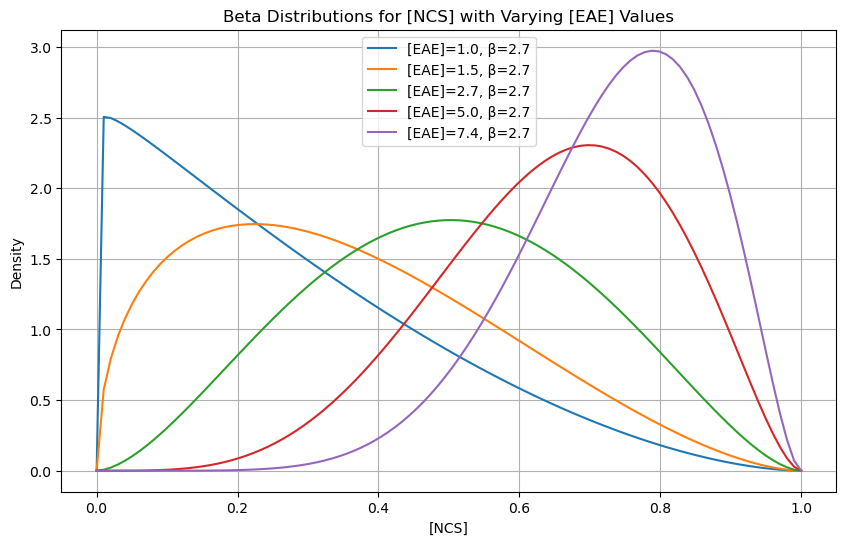

In [3]:
# NCS = [negative cognitive schemas]

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define a range of alpha values
alpha_values = [np.exp(0.01)*np.exp(0.01), np.exp(0.2)*np.exp(0.2), np.exp(0.5)*np.exp(0.5), np.exp(0.8)*np.exp(0.8), np.exp(1)*np.exp(1)]

# Define the beta parameter (constant)
beta_value = 2.7

# Create an array of x values (from 0 to 1)
x = np.linspace(0, 1, 100)

# Plot the Beta distributions for each alpha value
plt.figure(figsize=(10, 6))
for alpha_value in alpha_values:
    y = beta.pdf(x, alpha_value, beta_value)
    plt.plot(x, y, label=f'[EAE]={alpha_value:.1f}, β={beta_value}')

# Add labels and title
plt.title('Beta Distributions for [NCS] with Varying [EAE] Values')
plt.xlabel('[NCS]')
plt.ylabel('Density')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()




